In [1]:
import glob
import numpy as np
import pandas as pd
import plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
train_A_over_logs = "../eval/20190329_RetinaNet_train_A_over_class_eval/13"
train_B_over_logs = "../eval/20190329_RetinaNet_train_B_over_class_eval/13"
train_C_over_logs = "../eval/20190329_RetinaNet_train_C_over_class_eval/13"
train_A_over_ganaug_025_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_025_class_eval/13"
train_A_over_ganaug_050_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_050_class_eval/13"
pattern = "/**/*test_night*.txt"

num_last_iteration = 240000
train_A_over_iteration = 240000 # None = best
train_B_over_iteration = 240000 # None = best
train_C_over_iteration = 240000 # None = best
train_A_over_ganaug_025_iteration = 240000 # None = best
train_A_over_ganaug_050_iteration = 240000 # None = best

In [3]:
train_A_over_logs = glob.glob(train_A_over_logs + pattern, recursive = True)
train_B_over_logs = glob.glob(train_B_over_logs + pattern, recursive = True)
train_C_over_logs = glob.glob(train_C_over_logs + pattern, recursive = True)

train_A_over_ganaug_025_logs = glob.glob(train_A_over_ganaug_025_logs + pattern, recursive = True)
train_A_over_ganaug_050_logs = glob.glob(train_A_over_ganaug_050_logs + pattern, recursive = True)

In [4]:
def logs2df(logs, num_last_iteration, iteration = None):
    df_iterations = pd.DataFrame()
    for log in logs:
        df = pd.read_csv(log)
        df = df.drop(columns = ["Unnamed: 12"])
        df["Iteration"] = num_last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
        df_iterations = pd.concat([df_iterations, df], axis = 0)
        df_iterations = df_iterations.reset_index(drop = True)
    df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)
    if iteration is not None:
        df_iterations = df_iterations.loc[df_iterations.Iteration == iteration].drop_duplicates(["Iteration"], keep = "last").reset_index(drop = True)
    df_iterations = df_iterations.set_index("Iteration")
    return df_iterations

## Last (or other specified) iterations ##

### --> All metrics are evaluated on the selected iteration <-- ###

### train_A_over ###

In [5]:
df_train_A_over = logs2df(train_A_over_logs, num_last_iteration, train_A_over_iteration)
df_train_A_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
240000,0.248707,0.523496,0.206713,0.189754,0.420465,0.486269,0.11798,0.357773,0.391025,0.344821,0.538207,0.575


In [6]:
df_train_A_over_best_iter_per_metric = df_train_A_over.idxmax().to_frame().T
df_train_A_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000


In [7]:
df_train_A_over_best_val_per_metric = df_train_A_over.max().to_frame().T
df_train_A_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.248707,0.523496,0.206713,0.189754,0.420465,0.486269,0.11798,0.357773,0.391025,0.344821,0.538207,0.575


### train_B_over ###

In [8]:
df_train_B_over = logs2df(train_B_over_logs, num_last_iteration, train_B_over_iteration)
df_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
240000,0.274313,0.574653,0.228427,0.208453,0.461173,0.517943,0.122452,0.384789,0.412625,0.362191,0.57669,0.567308


In [9]:
df_train_B_over_best_iter_per_metric = df_train_B_over.idxmax().to_frame().T
df_train_B_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000


In [10]:
df_train_B_over_best_val_per_metric = df_train_B_over.max().to_frame().T
df_train_B_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.274313,0.574653,0.228427,0.208453,0.461173,0.517943,0.122452,0.384789,0.412625,0.362191,0.57669,0.567308


### train_C_over ###

In [11]:
df_train_C_over = logs2df(train_C_over_logs, num_last_iteration, train_C_over_iteration)
df_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
240000,0.275147,0.579803,0.222714,0.206323,0.466153,0.522904,0.122787,0.377852,0.409583,0.359482,0.569655,0.603846


In [12]:
df_train_C_over_best_iter_per_metric = df_train_C_over.idxmax().to_frame().T
df_train_C_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000


In [13]:
df_train_C_over_best_val_per_metric = df_train_C_over.max().to_frame().T
df_train_C_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.275147,0.579803,0.222714,0.206323,0.466153,0.522904,0.122787,0.377852,0.409583,0.359482,0.569655,0.603846


### train_A_over_ganaug_025 ###

In [14]:
df_train_A_over_ganaug_025 = logs2df(train_A_over_ganaug_025_logs, num_last_iteration, train_A_over_ganaug_025_iteration)
df_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
240000,0.237329,0.510072,0.186127,0.175572,0.4125,0.51664,0.112473,0.344539,0.375875,0.326932,0.528276,0.617308


In [15]:
df_train_A_over_ganaug_025_best_iter_per_metric = df_train_A_over_ganaug_025.idxmax().to_frame().T
df_train_A_over_ganaug_025_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000


In [16]:
df_train_A_over_ganaug_025_best_val_per_metric = df_train_A_over_ganaug_025.max().to_frame().T
df_train_A_over_ganaug_025_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.237329,0.510072,0.186127,0.175572,0.4125,0.51664,0.112473,0.344539,0.375875,0.326932,0.528276,0.617308


### train_A_over_ganaug_050 ###

In [17]:
df_train_A_over_ganaug_050 = logs2df(train_A_over_ganaug_050_logs, num_last_iteration, train_A_over_ganaug_050_iteration)
df_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
240000,0.231127,0.496312,0.184016,0.169098,0.405384,0.518576,0.110374,0.340189,0.372711,0.322191,0.532414,0.590385


In [18]:
df_train_A_over_ganaug_050_best_iter_per_metric = df_train_A_over_ganaug_050.idxmax().to_frame().T
df_train_A_over_ganaug_050_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000,240000


In [19]:
df_train_A_over_ganaug_050_best_val_per_metric = df_train_A_over_ganaug_050.max().to_frame().T
df_train_A_over_ganaug_050_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.231127,0.496312,0.184016,0.169098,0.405384,0.518576,0.110374,0.340189,0.372711,0.322191,0.532414,0.590385


## Improvements ##

### train_A_over --> train_B_over ###

In [20]:
df_train_A_over_TO_train_B_over = df_train_B_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_B_over["Comparison"] = "A to B"
df_train_A_over_TO_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.025606,0.051158,0.021714,0.018699,0.040707,0.031674,0.004472,0.027016,0.0216,0.017371,0.038483,-0.007692,A to B


### train_A_over --> train_C_over ###

In [21]:
df_train_A_over_TO_train_C_over = df_train_C_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_C_over["Comparison"] = "A to C"
df_train_A_over_TO_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.02644,0.056307,0.016001,0.016569,0.045688,0.036636,0.004807,0.020079,0.018558,0.014661,0.031448,0.028846,A to C


### train_A_over --> train_A_over_ganaug_025 ###

In [22]:
df_train_A_over_TO_train_A_over_ganaug_025 = df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_025["Comparison"] = "A to A25"
df_train_A_over_TO_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.011379,-0.013423,-0.020586,-0.014181,-0.007965,0.030372,-0.005507,-0.013234,-0.015151,-0.017888,-0.009931,0.042308,A to A25


### train_A_over --> train_A_over_ganaug_050 ###

In [23]:
df_train_A_over_TO_train_A_over_ganaug_050 = df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_050["Comparison"] = "A to A50"
df_train_A_over_TO_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.01758,-0.027184,-0.022697,-0.020655,-0.015081,0.032307,-0.007606,-0.017584,-0.018315,-0.022629,-0.005793,0.015385,A to A50


## Combine ##

In [24]:
df_combined = pd.concat([df_train_A_over_TO_train_B_over, df_train_A_over_TO_train_C_over, df_train_A_over_TO_train_A_over_ganaug_025, df_train_A_over_TO_train_A_over_ganaug_050], axis = 0)

In [25]:
df_combined = df_combined.set_index("Comparison")
df_combined.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Comparison,,,,,,,,,,,,
A to B,0.025606,0.051158,0.021714,0.018699,0.040707,0.031674,0.004472,0.027016,0.0216,0.017371,0.038483,-0.007692


Text(0, 0.5, 'Absolute change in score')

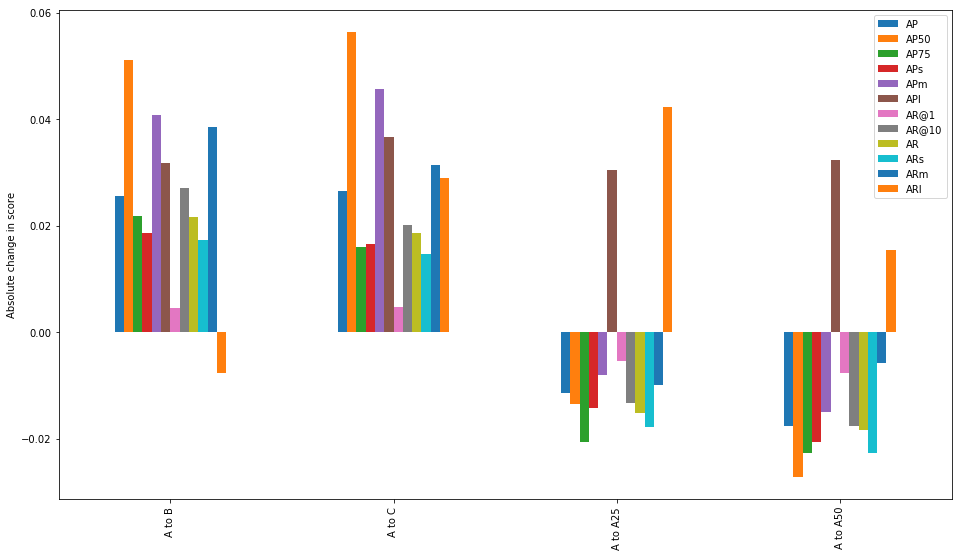

In [26]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score")

In [27]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)

In [28]:
df_combined = df_combined * 100

Text(0, 0.5, 'Absolute change in score (%)')

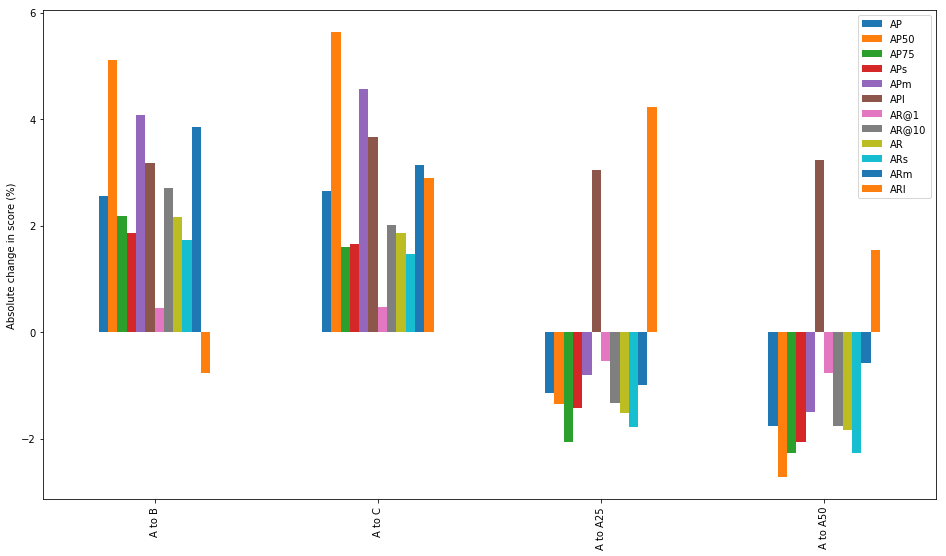

In [29]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score (%)")

In [30]:
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score (%)"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)